<a href="https://colab.research.google.com/github/angie102001/IABO/blob/main/Copia_de_Lab3_Normalizar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
# Libreria para el manejo de datos
import pandas as pd
# Funciones para crear la esctructura de los clasificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# Base de datos de Fisher-Iris
from sklearn.datasets import load_iris
# Funciones para la separación de la base de datos
from sklearn.model_selection import train_test_split
# Funciones para la mediada del desempeño de los clasificadores
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import tensorflow as tf
import numpy as np
from tensorflow import keras 
from tensorflow.keras import layers
from keras.models import Sequential

In [ ]:
!git clone https://github.com/angie102001/IABO

Cloning into 'IABO'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 29 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [ ]:
datosAbajo = pd.read_excel("/content/IABO/DATOS IMU.xlsx",sheet_name="Abajo 50 datos")
datosIzq = pd.read_excel("/content/IABO/DATOS IMU.xlsx",sheet_name="LadoIzq 50 datos")
datosDer = pd.read_excel("/content/IABO/DATOS IMU.xlsx",sheet_name="LadoDer 50 datos")
datosArriba = pd.read_excel("/content/IABO/DATOS IMU.xlsx",sheet_name="Arriba 50 datos", names=list(datosAbajo.columns) + ["F1","F2"])
datosEstable = pd.read_excel("/content/IABO/DATOS IMU.xlsx",sheet_name="Estable 50",names = list(datosAbajo.columns) + ["F1","F2"])

abajo = datosAbajo.groupby(np.arange(len(datosAbajo)) // 9).mean()
izq = datosIzq.groupby(np.arange(len(datosIzq)) // 9).mean()
der = datosDer.groupby(np.arange(len(datosDer)) // 9).mean()
arriba = datosArriba.groupby(np.arange(len(datosArriba)) // 9).mean()
estable = datosEstable.groupby(np.arange(len(datosEstable)) // 9).mean()


## Division del dataset

In [ ]:
#0 -> Estable
#1 -> Abajo
#2 -> Derecha
#3 -> Arriba
#4 -> Izquierda

import random


estable = estable.loc[:,"aX":"mZ"]
abajo = abajo.loc[:,"aX":"mZ"]
der = der.loc[:,"aX":"mZ"]
arriba = arriba.loc[:,"aX":"mZ"]
izq = izq.loc[:,"aX":"mZ"]

estable["class"] = [0 for i in range(len(estable))]
estable["gX"] = [random.random()*60 - 30 for i in range(len(estable))]
estable["gY"] = [random.random()*60 - 30 for i in range(len(estable))]
estable["aY"] = [random.random()*0.3 - 0.15 for i in range(len(estable))]
estable["aX"] = [random.random()*0.4 - 0.2 for i in range(len(estable))]



abajo["class"] = [1 for i in range(len(abajo))]
abajo["gY"] = abajo["gY"].apply(lambda x: x + 35 if (x < 50) else x)
abajo["aX"] = abajo["aX"].apply(lambda x: x + 0.2 if (x < 0.2) else x)

der["class"] = [2 for i in range(len(der))]
der["gX"] = der["gX"].apply(lambda x: x + 90 if (x < -100) else x)
der["gX"] = der["gX"].apply(lambda x: x - 25 if (x < 40) else x)
der["aY"] = der["aY"].apply(lambda x: x + 0.2 if (x < 0.2) else x)


arriba["class"] = [3 for i in range(len(arriba))]
arriba["gY"] = arriba["gY"].apply(lambda x: x - 10 if (x > -55) else x)
arriba["aX"] = arriba["aX"].apply(lambda x: x - 0.1 if (x > -0.25) else x)

izq["class"] = [4 for i in range(len(izq))]
izq["gX"] = izq["gX"].apply(lambda x: x - 80 if (x > 100) else x)
izq["gX"] = izq["gX"].apply(lambda x: x + 25 if (x > -50) else x)
izq["aY"] = izq["aY"].apply(lambda x: x - 0.1 if (x > -0.2) else x)


frames = [estable,abajo,der,arriba,izq]
datos = pd.concat(frames)
datos = datos.reset_index()
datos = datos.drop(columns = ["index"])




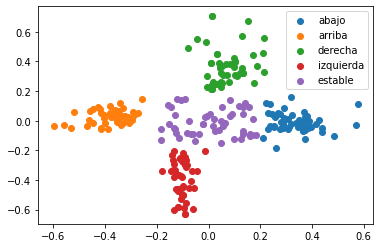

In [ ]:
plt.scatter(abajo["aX"],abajo["aY"],label="abajo")
plt.scatter(arriba["aX"],arriba["aY"],label="arriba")
plt.scatter(der["aX"],der["aY"],label="derecha")
plt.scatter(izq["aX"],izq["aY"],label="izquierda")
plt.scatter(estable["aX"],estable["aY"],label="estable")
plt.legend()


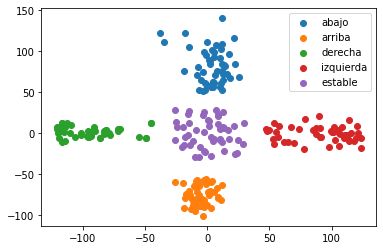

In [ ]:

plt.scatter(abajo["gX"],abajo["gY"],label="abajo")
plt.scatter(arriba["gX"],arriba["gY"],label="arriba")
plt.scatter(der["gX"],der["gY"],label="derecha")
plt.scatter(izq["gX"],izq["gY"],label="izquierda")
plt.scatter(estable["gX"],estable["gY"],label="estable")
plt.legend()

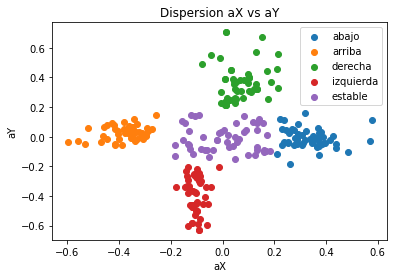

In [ ]:
gx = list(datos["gX"])
gy = list(datos["gY"])
gz = list(datos["gZ"])
ax = list(datos["aX"])
ay = list(datos["aY"])
az = list(datos["aZ"])

y = list(datos["class"])


plt.scatter(abajo["aX"],abajo["aY"],label="abajo")
plt.scatter(arriba["aX"],arriba["aY"],label="arriba")
plt.scatter(der["aX"],der["aY"],label="derecha")
plt.scatter(izq["aX"],izq["aY"],label="izquierda")
plt.scatter(estable["aX"],estable["aY"],label="estable")
plt.legend()
plt.title("Dispersion aX vs aY")
plt.xlabel("aX")
plt.ylabel("aY")
plt.show()

In [ ]:
#matriz = np.array([ax,ay,az,gx,gy,gz])
matriz = np.array([ax,ay])
X = np.transpose(matriz)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## kNN - K-Vecinos cercanos

In [ ]:
vecinosTrain = KNeighborsClassifier(n_neighbors=4)
vecinosTrain.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
clasificacion= vecinosTrain.predict(x_test)
mat_con=confusion_matrix(y_test,clasificacion)
print("Matriz de confusión :\n",mat_con)
print("Exactitud : ",accuracy_score(y_test,clasificacion))

Matriz de confusión :
 [[19  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 14]]
Exactitud :  1.0


## Arboles de decisión

In [ ]:
clasificador_DT=DecisionTreeClassifier()
clasificador_DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
import graphviz 
from sklearn import tree

#dot_data = tree.export_graphviz(clasificador_DT, out_file=None,
#                                feature_names=["ax","ay","az","gx","gy","gz"],class_names=["Estable","Abajo","Derecha","Arriba","Izquierda"])
dot_data = tree.export_graphviz(clasificador_DT, out_file=None,
                               feature_names=["ax","ay"],class_names=["Estable","Abajo","Derecha","Arriba","Izquierda"]) 
graph = graphviz.Source(dot_data) 
graph.render("inclinacion") 

'inclinacion.pdf'

In [ ]:
clasificacion= clasificador_DT.predict(x_test)
mat_con=confusion_matrix(y_test,clasificacion)
print(mat_con)
print(accuracy_score(y_test,clasificacion))

[[19  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 14]]
1.0


In [ ]:
!pip install micromlgen

In [ ]:
from micromlgen import port
print(port(clasificador_DT))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTree {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        if (x[0] <= -0.2191111147403717) {
                            return 3;
                        }

                        else {
                            if (x[1] <= -0.1957777738571167) {
                                return 4;
                            }

                            else {
                                if (x[1] <= 0.18699999898672104) {
                                    if (x[0] <= 0.18471889197826385) {
                                        return 0;
                                    }

                                    else {
                                        return 1;
                                    }
               

#Naive Bayes Gaussiano

In [ ]:
clasificador_GNB=gnb = GaussianNB()
clasificador_GNB.fit(x_train,y_train)

GaussianNB()

In [ ]:
print("Medias : ",clasificador_GNB.theta_)
print("Varianzas : ",clasificador_GNB.var_)

Medias :  [[-0.01389682 -0.0033064 ]
 [ 0.32396057 -0.00710753]
 [ 0.06034259  0.38442284]
 [-0.38255996  0.02332148]
 [-0.10364815 -0.41159259]]
Varianzas :  [[0.01025619 0.00229011]
 [0.0062623  0.00539835]
 [0.00365202 0.01652983]
 [0.00557002 0.00228771]
 [0.00082499 0.01301609]]


In [ ]:
clasificacion= clasificador_GNB.predict(x_test)
mat_con=confusion_matrix(y_test,clasificacion)
print(mat_con)
print(accuracy_score(y_test,clasificacion))

[[19  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 14]]
1.0


In [ ]:
print(port(clasificador_GNB))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class GaussianNB {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        float votes[5] = { 0.0f };
                        float theta[2] = { 0 };
                        float sigma[2] = { 0 };
                        theta[0] = 0.004474748351; theta[1] = -0.001915255908;
                        sigma[0] = 0.010287530708; sigma[1] = 0.002764734434;
                        votes[0] = 0.222857142857 - gauss(x, theta, sigma);
                        theta[0] = 0.334059027778; theta[1] = 0.007899305556;
                        sigma[0] = 0.007330257769; sigma[1] = 0.004506612225;
                        votes[1] = 0.182857142857 - gauss(x, theta, sigma);
                        theta[0] = 0.079483660131; theta[1] = 0.343294117647;
           

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
derechaMedias = der.groupby(np.arange(len(der))//9).mean()
derechaDesviaciones = der.groupby(np.arange(len(der))//9).std()

abajoMedias = abajo.groupby(np.arange(len(abajo))//9).mean()
abajoDesviaciones = abajo.groupby(np.arange(len(abajo))//9).std()

izquierdaMedias = izq.groupby(np.arange(len(izq))//9).mean()
izquierdaDesviaciones = izq.groupby(np.arange(len(izq))//9).std()

arribaMedias = arriba.groupby(np.arange(len(arriba))//9).mean()
arribaDesviaciones = arriba.groupby(np.arange(len(arriba))//9).std()

estableMedias = estable.groupby(np.arange(len(estable))//9).mean()
estableDesviaciones = estable.groupby(np.arange(len(estable))//9).std()

media_MovimientoDerecho = derechaMedias.mean()
media_MovimientoIzquierdo = izquierdaMedias.mean()
media_MovimientoAbajo = abajoMedias.mean()
media_MovimientoArriba = arribaMedias.mean()
media_MovimientoEstable = estableMedias.mean()

desv_MovimientoDerecho = derechaDesviaciones.std()
desv_MovimientoIzquierdo = izquierdaDesviaciones.std()
desv_MovimientoArriba = arribaDesviaciones.std()
desv_MovimientoAbajo = abajoDesviaciones.std()
desv_MovimientoEstable = estableDesviaciones.std()

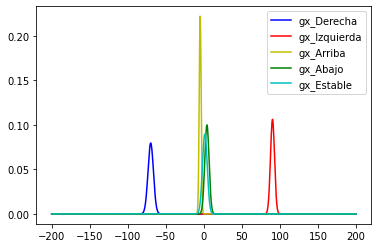

In [ ]:
x1=np.linspace(-200,200,1000)
x2=np.linspace(-200,200,1000)
Px1_y1=(1/(desv_MovimientoDerecho["gX"]*np.sqrt(2*np.pi)))*np.exp(-((x1-media_MovimientoDerecho["gX"])**2)/(desv_MovimientoDerecho["gX"]**2))
plt.plot(x1,Px1_y1,'b',label='gx_Derecha')
Px1_y2=(1/(desv_MovimientoIzquierdo["gX"]*np.sqrt(2*np.pi)))*np.exp(-((x1-media_MovimientoIzquierdo["gX"])**2)/(desv_MovimientoIzquierdo["gX"]**2))
plt.plot(x1,Px1_y2,'r',label='gx_Izquierda')
Px1_y3=(1/(desv_MovimientoArriba["gX"]*np.sqrt(2*np.pi)))*np.exp(-((x1-media_MovimientoArriba["gX"])**2)/(desv_MovimientoArriba["gX"]**2))
plt.plot(x1,Px1_y3,'y',label='gx_Arriba')
Px1_y4=(1/(desv_MovimientoAbajo["gX"]*np.sqrt(2*np.pi)))*np.exp(-((x1-media_MovimientoAbajo["gX"])**2)/(desv_MovimientoAbajo["gX"]**2))
plt.plot(x1,Px1_y4,'g',label='gx_Abajo')
Px1_y5=(1/(desv_MovimientoEstable["gX"]*np.sqrt(2*np.pi)))*np.exp(-((x1-media_MovimientoEstable["gX"])**2)/(desv_MovimientoEstable["gX"]**2))
plt.plot(x1,Px1_y5,'c',label='gx_Estable')
plt.legend()

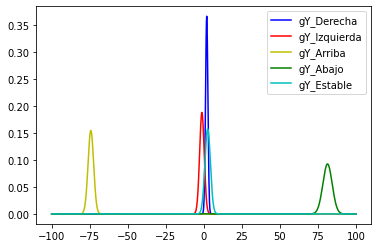

In [ ]:
x1=np.linspace(-100,100,1000)
x2=np.linspace(-100,100,1000)
Px1_y1=(1/(desv_MovimientoDerecho["gY"]*np.sqrt(2*np.pi)))*np.exp(-((x1-media_MovimientoDerecho["gY"])**2)/(desv_MovimientoDerecho["gY"]**2))
plt.plot(x1,Px1_y1,'b',label='gY_Derecha')
Px1_y2=(1/(desv_MovimientoIzquierdo["gY"]*np.sqrt(2*np.pi)))*np.exp(-((x1-media_MovimientoIzquierdo["gY"])**2)/(desv_MovimientoIzquierdo["gY"]**2))
plt.plot(x1,Px1_y2,'r',label='gY_Izquierda')
Px1_y3=(1/(desv_MovimientoArriba["gY"]*np.sqrt(2*np.pi)))*np.exp(-((x1-media_MovimientoArriba["gY"])**2)/(desv_MovimientoArriba["gY"]**2))
plt.plot(x1,Px1_y3,'y',label='gY_Arriba')
Px1_y4=(1/(desv_MovimientoAbajo["gY"]*np.sqrt(2*np.pi)))*np.exp(-((x1-media_MovimientoAbajo["gY"])**2)/(desv_MovimientoAbajo["gY"]**2))
plt.plot(x1,Px1_y4,'g',label='gY_Abajo')
Px1_y5=(1/(desv_MovimientoEstable["gY"]*np.sqrt(2*np.pi)))*np.exp(-((x1-media_MovimientoEstable["gY"])**2)/(desv_MovimientoEstable["gY"]**2))
plt.plot(x1,Px1_y5,'c',label='gY_Estable')
plt.legend()

In [ ]:
!pip install --upgrade micromlgen

In [ ]:
from micromlgen import port
print(port(clasificador_DT))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTree {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        if (x[1] <= -0.15194445103406906) {
                            return 4;
                        }

                        else {
                            if (x[1] <= 0.1711111143231392) {
                                if (x[0] <= -0.16511110961437225) {
                                    return 3;
                                }

                                else {
                                    if (x[0] <= 0.16055555641651154) {
                                        if (x[1] <= -0.008944444358348846) {
                                            if (x[0] <= 0.07705555483698845) {
                                                if (x[0] <= -0.051

## Perceptron multicapa (MLP)

In [ ]:
clasificador_MLP=MLPClassifier(alpha =0.4,hidden_layer_sizes=3,max_iter=1100)
clasificador_MLP.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=0.4, hidden_layer_sizes=3, max_iter=1100)

In [ ]:
print(" Pesos : ", clasificador_MLP.coefs_)
print(" Interceptos : ", clasificador_MLP.intercepts_)

 Pesos :  [array([[-0.40431968,  1.92319558,  2.02599925],
       [ 2.0180819 , -0.38956833,  1.49740223]]), array([[ 0.01901607, -0.46823384,  1.57813643,  0.9643016 , -1.34862584],
       [-0.82707116,  1.32138892, -1.08763136, -0.81138781, -0.99765682],
       [ 0.45674416,  1.85141881,  1.08886657, -1.73145434, -0.79574155]])]
 Interceptos :  [array([0.47954237, 0.06189596, 0.6188991 ]), array([ 0.06529308, -1.30356584, -0.91611559,  0.5520441 ,  0.24513692])]


In [ ]:
clasificacion= clasificador_MLP.predict(x_test)
mat_con=confusion_matrix(y_test,clasificacion)
print(mat_con)
print(accuracy_score(y_test,clasificacion))

[[ 4  5  9  1  0]
 [ 0 19  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0 14  0]]
0.6133333333333333


## Support Vector Machines

In [ ]:
clasificador_SVM=svm.LinearSVC(random_state=10,C=100)
clasificador_SVM.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=100, random_state=10)

In [ ]:
clasificador_SVM.coef_

array([[  0.18166196,  -0.06437895],
       [ 17.99031679,  -1.78156967],
       [ -0.37375518,  15.94111192],
       [-12.39427713,   1.68403596],
       [ -1.54329019, -11.88775656]])

In [ ]:
clasificador_SVM.intercept_

array([-0.63914473, -3.418102  , -2.89305527, -2.75572861, -2.25032956])

In [ ]:
resultados=clasificador_SVM.predict(X)
print(confusion_matrix(y,resultados))
print(accuracy_score(y,resultados))

[[48  2  0  0  0]
 [ 0 50  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 50  0]
 [ 0  0  0  0 50]]
0.992


## Regresion logística

In [ ]:
clasificador_LR=LogisticRegression(max_iter = 1000)
clasificador_LR.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Coeficientes del modelo
print("Coeficientes : \n",clasificador_LR.coef_)
print("Sesgos : \n", clasificador_LR.intercept_)

Coeficientes : 
 [[ 0.22113168 -0.08561219]
 [ 4.50314818 -0.50125809]
 [ 0.78414137  4.75232379]
 [-4.92205106  0.71467611]
 [-0.58637017 -4.88012962]]
Sesgos : 
 [ 0.36648623  0.01525616 -0.09050617 -0.11073842 -0.1804978 ]


In [ ]:
clasificacion= clasificador_LR.predict(x_test)
mat_con=confusion_matrix(y_test,clasificacion)
print(mat_con)
print(accuracy_score(y_test,clasificacion))

[[ 9  7  0  3  0]
 [ 0 19  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 14]]
0.8666666666666667


In [ ]:
clasificador_SVM=svm.LinearSVC(random_state=10,C=100)
clasificador_SVM.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=100, random_state=10)

In [ ]:
resultados=clasificador_SVM.predict(X)
print(confusion_matrix(y,resultados))
print(accuracy_score(y,resultados))

[[48  2  0  0  0]
 [ 0 50  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 50  0]
 [ 0  0  0  0 50]]
0.992


In [ ]:
#print(port(clasificador_SVM))

TypeError: ignored